In [1]:
from dotblotr.analysis import calc_hit_counts
from dotblotr.process import process_dir
from dotblotr.viz import plot_value, plot_hit_counts, plot_detected_dots
import pandas as pd

# Description
This notebook is a vignette on how to process multiple strips and compare hits between them.

## Processing strips
First, we process all images in a directory. The `process_dir()` function performs the image quantification for each image in the directory. The directory should be set up as follows:

- each image file contains the images for one strip (control in the red channel, probe in the green channel)
- all strips should be from the same assay (i.e., the dots are the same probe in each strip)
- the file name is the strip ID
- the extension is `.tif`

The `process_dir()` function takes the following input arguments:

- `image_directory` [string]: the path to the directory in which the images are stored (see above for how to set up the directory).
- `blot_config_path` [string]: path to the configuration file for the geometry of the strip's dot array (e.g., number or rows/columns)
- `assay_config_path` [string]: path to the configuration file for the assay's setup. The assay config contains information about the source of the dots and the thresholds for positive hits.

The `process_dir()` function returns `results_table`, a pandas DataFrame containing the results for each spot. Each row in the resulting table contains the metadata (e.g., source of the phage, location in the strip, the strip ID) as well as the quantification of each spot. The results table is a pandas dataframe and thus can be sliced and processed using the standard pandas API.

In [2]:
image_directory = '/Users/kevin.yamauchi/Documents/ULTRA6 run individuals/test_dir'
blot_config_path = '../configs/384_tiny_config.json'
assay_config_path = '../configs/assay_config_anti-yo1.csv'
results_table = process_dir(image_directory, blot_config_path, assay_config_path)

In [3]:
# table of results for all 5 strips
results_table

,assay_id,strip_id,dot_name,source_plate_id,source_plate_row,source_plate_column,exp_group,zscore_threshold,blob_label,row,col,x,y,mean_intensity_control,area,mean_intensity_probe,norm_probe_intensity,positive_threshold,pos_hit
0,assay_config_anti-yo1.csv,2-D149,A1,Anti-Yo_1,A,1,neg,3,12.0,0.0,0.0,126.676568,161.155116,92.891089,303.0,62.082508,0.668337,0.933781,False
1,assay_config_anti-yo1.csv,2-D149,A2,Anti-Yo_1,A,2,neg,3,13.0,0.0,1.0,200.896552,160.773946,87.804598,261.0,61.429119,0.699612,0.933781,False
2,assay_config_anti-yo1.csv,2-D149,A3,Anti-Yo_1,A,3,neg,3,21.0,0.0,2.0,277.382022,166.370787,83.820225,267.0,60.254682,0.718856,0.933781,False
3,assay_config_anti-yo1.csv,2-D149,A4,Anti-Yo_1,A,4,exp,3,2.0,0.0,3.0,346.685969,158.305122,122.008909,449.0,71.394209,0.585156,0.933781,False
4,assay_config_anti-yo1.csv,2-D149,A5,Anti-Yo_1,A,5,neg,3,22.0,0.0,4.0,431.397380,166.183406,79.305677,229.0,56.842795,0.716756,0.933781,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1904,assay_config_anti-yo1.csv,6-D162,P20,Anti-Yo_1,P,20,exp,3,376.0,15.0,19.0,1526.907738,1269.184524,191.520833,336.0,185.232143,0.967164,0.275515,True
1905,assay_config_anti-yo1.csv,6-D162,P21,Anti-Yo_1,P,21,exp,3,378.0,15.0,20.0,1587.375000,1271.340116,191.904070,344.0,77.171512,0.402136,0.275515,True
1906,assay_config_anti-yo1.csv,6-D162,P22,Anti-Yo_1,P,22,exp,3,380.0,15.0,21.0,1654.889937,1272.270440,184.267296,318.0,255.000000,1.383859,0.275515,True
1907,assay_config_anti-yo1.csv,6-D162,P23,Anti-Yo_1,P,23,exp,3,381.0,15.0,22.0,1724.734807,1271.939227,194.527624,362.0,45.361878,0.233190,0.275515,False


## Plotting results
We provide some convenience functions for plotting the results on the dot array. `plot_value` generates a heatmap of a given parameter on the array. `plot_value` takes two input arguments:

- `blot_df`: the results table to plot from
- `col_label`: the name of the column in the results table to plot.

In the example below, we are slicing the results table to extract just the results corresponding with third `strip_id` and passing that as `blot_df`. We then want to see that spots that have positive hits, so we pass the positive hit column name (`pos_hit`, see the `result_table` above).

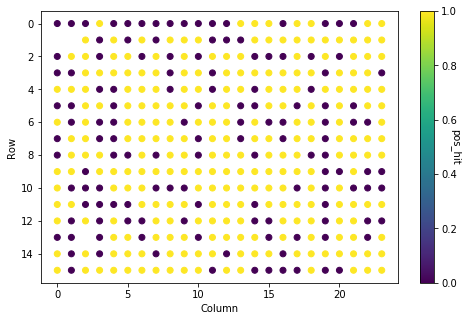

In [4]:
# make a list of all of the strip_ids
strip_ids = results_table['strip_id'].unique()

# get the results from just the third strip_id
third_strip_results = results_table.loc[results_table['strip_id'] == strip_ids[2]]

# make a dot plot of the dots that are positive (yellow) for the third strip
plot_value(third_strip_results, 'pos_hit');

## Calculating hit counts across strips
We can calculate the number of hits for each dot across strips using `calc_hit_counts()`. `calc_hit_counts()` takes a `results_table` from the analysis above and iterates over each `assay_id`, so as to only compare across strips from the same assay. The output is the `hit_dfs` list where each element of the list is the hit counts table for a given `assay_id` in the `results_table`. Since we only have one `assay_id` in this example, there is only one element in the list.

In [5]:
# table of hit counts
hit_dfs = calc_hit_counts(results_table)
hit_dfs[0]

,dot_name,assay_id,source_plate_id,source_plate_row,source_plate_column,exp_group,row,col,n_hits
0,A1,assay_config_anti-yo1.csv,Anti-Yo_1,A,1,neg,0.0,0.0,0
1,A2,assay_config_anti-yo1.csv,Anti-Yo_1,A,2,neg,0.0,1.0,0
2,A3,assay_config_anti-yo1.csv,Anti-Yo_1,A,3,neg,0.0,2.0,0
3,A4,assay_config_anti-yo1.csv,Anti-Yo_1,A,4,exp,0.0,3.0,2
4,A5,assay_config_anti-yo1.csv,Anti-Yo_1,A,5,neg,0.0,4.0,0
...,...,...,...,...,...,...,...,...,...
377,P20,assay_config_anti-yo1.csv,Anti-Yo_1,P,20,exp,15.0,19.0,1
378,P21,assay_config_anti-yo1.csv,Anti-Yo_1,P,21,exp,15.0,20.0,1
379,P22,assay_config_anti-yo1.csv,Anti-Yo_1,P,22,exp,15.0,21.0,4
380,P23,assay_config_anti-yo1.csv,Anti-Yo_1,P,23,exp,15.0,22.0,1


## Finding common hits
We can query the table to learn how the dots vary across strips. In this example, we get a list of the dots that are positive in all 5 strips we analyzed.

In [6]:
# get a table of dots that are positive in all 5 samples
df = hit_dfs[0]
df.loc[df['n_hits'] == 5]

,dot_name,assay_id,source_plate_id,source_plate_row,source_plate_column,exp_group,row,col,n_hits
65,C20,assay_config_anti-yo1.csv,Anti-Yo_1,C,20,exp,2.0,19.0,5
120,F3,assay_config_anti-yo1.csv,Anti-Yo_1,F,3,exp,5.0,2.0,5
156,G15,assay_config_anti-yo1.csv,Anti-Yo_1,G,15,exp,6.0,14.0,5
162,G21,assay_config_anti-yo1.csv,Anti-Yo_1,G,21,exp,6.0,20.0,5
238,K1,assay_config_anti-yo1.csv,Anti-Yo_1,K,1,exp,10.0,0.0,5
381,P24,assay_config_anti-yo1.csv,Anti-Yo_1,P,24,exp,15.0,23.0,5


## Plotting hit counts
We provide a convenience function for plotting hit counts (`plot_hit_counts()`). This generates a heat map plotted on the dot array. The dots without any hits are white and the dots with hits are colored based on the number of hits they had.

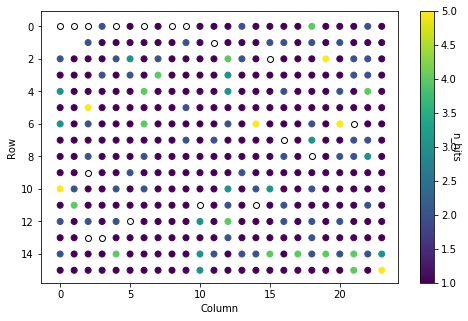

In [7]:
# plot the hit counts on the array.
# spots with white dots had 0 hits
plot_hit_counts(hit_dfs[0]);

## Validating spot locations
We can validate the locations of the spots we found by overlaying the spot labels on the strip image. We can do so by using the `plot_detected_dots()` function. `plot_detected_dots()` takes the following input arguments:
- `results_table`: the table that is the output of `process_dir()` above
- `image_directory`: the path to the directory containing the strip images. This is the same as used in `process_dir()`
- `strip_id`: the identifier for the strip to be plotted. This is the value from the `strip_id` column of the `results_table`. `strip_id` should be passed as a string.

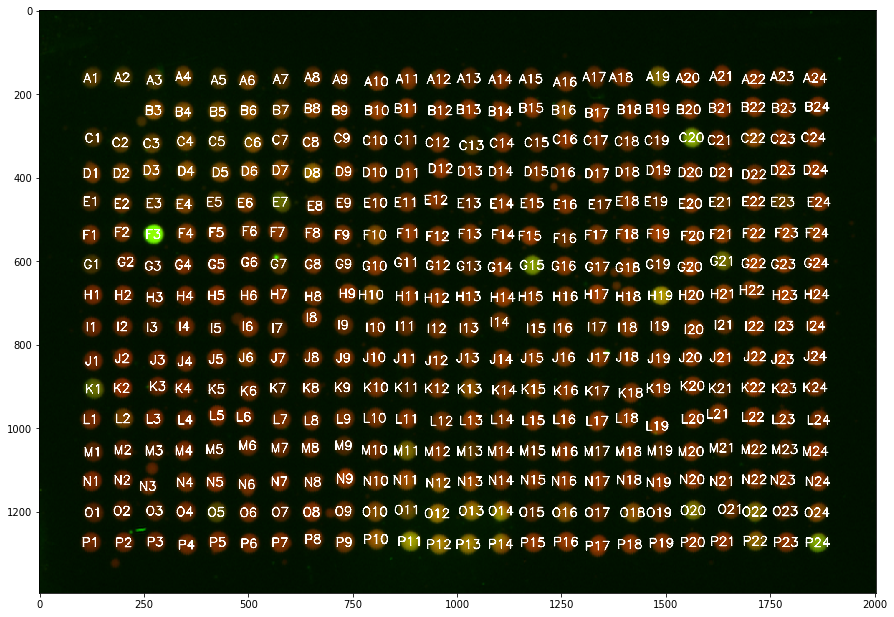

In [8]:
f, ax = plot_detected_dots(results_table=results_table, image_directory=image_directory, strip_id='2-D149')